In [17]:
import os
import ast
import json
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [18]:
exp_dir = Path("/Users/andreas/workspace/thesis-code/out/fedless-shakespeare-flower")
#session_id = "d302c4be-cf23-4ce2-8a6a-c0975870fcf4"

#Fedless Shakespeare 3c1dd162-a3b9-483a-b7da-faf5aa0a800d
#Fedless MNIST cc1ee881-e81e-46fe-81e9-87872de160f4
timing_dfs = []
clients_dfs = []
for f in exp_dir.glob("timing_*.csv"):
    timing_dfs.append(pd.read_csv(exp_dir / f, index_col="round_id"))
for f in exp_dir.glob("clients_*.csv"):
    clients_dfs.append(pd.read_csv(exp_dir / f))
timing_df = pd.concat(timing_dfs)
clients_df = pd.concat(clients_dfs)
#timing_df = pd.read_csv(exp_dir / f"timing_{session_id}.csv")
#clients_df = pd.read_csv(exp_dir / f"clients_{session_id}.csv")

clients_df["function"] = clients_df["function"].map(json.loads)

In [19]:
#timing_df['client_accs'] = timing_df['all_accuracy'].map(ast.literal_eval)#.map(lambda li: [float(l) for l in li])
#timing_df = timing_df.explode('client_accs', ignore_index=True)
#timing_df['client_accs'] = timing_df['client_accs'].astype(float)
#timing_df['client_accs'] = timing_df['client_accs'].astype(float)

<AxesSubplot:xlabel='round_id', ylabel='global_test_accuracy'>

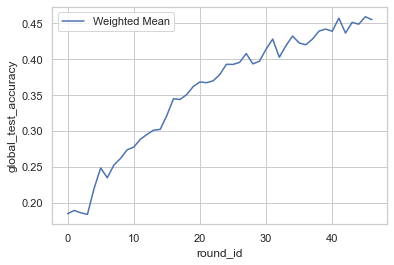

In [20]:

fig, ax = plt.subplots()
sns.lineplot(x="round_id", y="global_test_accuracy", data=timing_df, ax=ax, label="Weighted Mean")
#sns.lineplot(x="round_id", y="median_test_accuracy", data=timing_df, ax=ax, label="Weighted Mean")
#sns.lineplot(x="round_id", y="client_accs", data=timing_df, ax=ax, label="Client Distribution")
#sns.lineplot(x="round_id", y="seconds", data=clients_df, ax=ax)

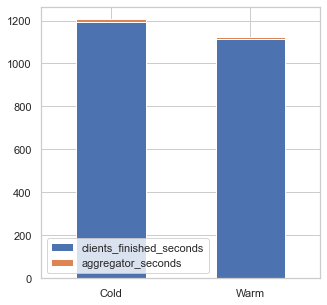

In [21]:
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(5, 5))
#sns.set_color_codes("muted")
#sns.set_color_codes("muted")
#sns.barplot(x="round_id", y="round_seconds", data=timing_df, ax=ax, label="Weighted Mean", color="b")
#sns.barplot(x="round_id", y="clients_finished_seconds", data=timing_df, ax=ax, label="Total", color="b")
#sns.barplot(x="round_id", y="clients_finished_seconds", data=timing_df, ax=ax, label="Clients", color="r")
#sns.barplot(x="round_id", y="aggregator_seconds", data=timing_df, ax=ax, label="Aggregator", color="g")
#timing_df[["clients_finished_seconds", "aggregator_seconds", "evaluator_seconds"]].plot.bar(stacked=True, ax=ax)
cold_starts = timing_df[timing_df.index == 0]
warm_starts = timing_df[timing_df.index != 0]
cold_starts_mean = cold_starts.mean(numeric_only=True).to_frame().T
warm_starts_mean = warm_starts.mean(numeric_only=True).to_frame().T
cold_starts_std = cold_starts.std(numeric_only=True).to_frame().T
warm_starts_std = warm_starts.std(numeric_only=True).to_frame().T
all_df = pd.concat((cold_starts_mean, warm_starts_mean))
all_df[["clients_finished_seconds", "aggregator_seconds"]].plot.bar(stacked=True, ax=ax)
ax.set_xticklabels(["Cold", "Warm"], rotation=0)
#warm_starts_mean[["clients_finished_seconds", "aggregator_seconds", "evaluator_seconds"]].plot.bar(stacked=True, ax=ax)
#timing_df[["clients_finished_seconds", "aggregator_seconds", "evaluator_seconds"]].plot.bar(stacked=True, ax=ax)
#timing_df[["clients_finished_seconds", "aggregator_seconds", "evaluator_seconds"]].mean().plot.pie(subplots=True, ax=ax)
fig.savefig("/Users/andreas/desktop/time-cold-warm.pdf")

In [22]:
warm_starts_mean
#fig, ax = plt.subplots()
#sns.barplot(x=timing_df.index, y="round_seconds", data=timing_df, ax=ax, color="b")

,Unnamed: 0,aggregator_seconds,round_seconds,clients_finished_seconds,num_clients_round,global_test_accuracy,global_test_loss
0,23.5,9.521703,1150.492759,1112.992318,25.0,0.358728,2.295945


<AxesSubplot:xlabel='round_id', ylabel='round_seconds'>

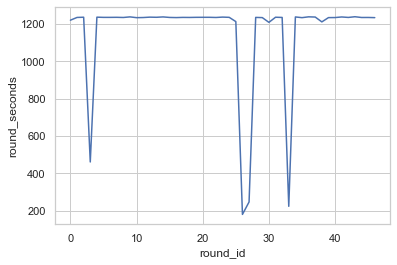

In [23]:
fig, ax = plt.subplots()
sns.lineplot(x="round_id", y="round_seconds", data=timing_df, ax=ax, color="b")

Text(0.5, 0, 'Round')

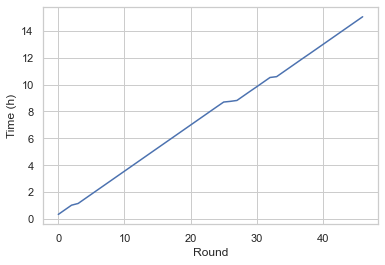

In [24]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
df = timing_df.copy()
df["time"] = df["round_seconds"].cumsum() / 3600
sns.lineplot(x="round_id", y="time", data=df, ax=ax)
ax.set_ylabel("Time (h)")
ax.set_xlabel("Round")

<AxesSubplot:xlabel='client_id', ylabel='seconds'>

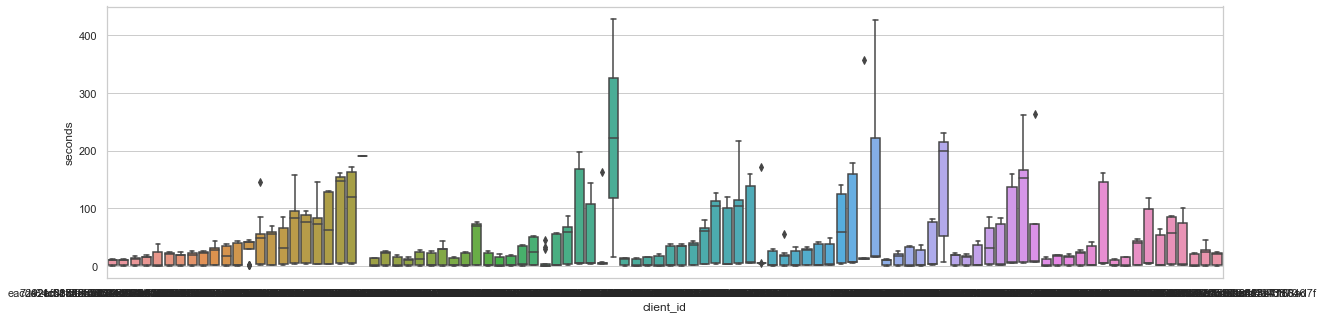

In [25]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.boxplot(x="client_id", y="seconds", data=clients_df, ax=ax)

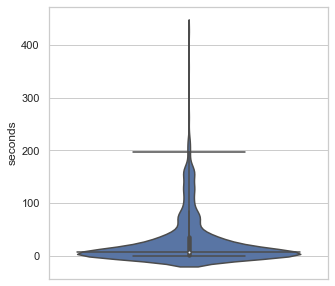

In [26]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="seconds", data=clients_df, showfliers=False, showbox=False, whis=[1.0,99.0], ax=ax)
sns.violinplot(y="seconds", data=clients_df, ax=ax)
fig.savefig("/Users/andreas/desktop/dist-violin.pdf")

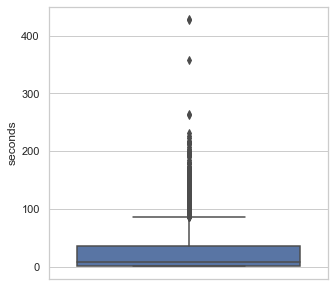

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.boxplot(y="seconds", data=clients_df, ax=ax)
fig.savefig("/Users/andreas/desktop/dist-box.pdf")

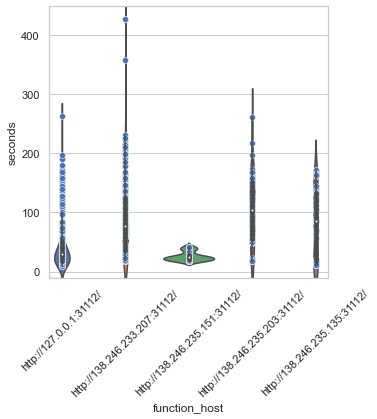

In [28]:
clients_df["function_type"] = clients_df["function"].map(lambda x: x["type"])
clients_df["function_host"] = clients_df["function"].map(lambda x: x["params"]["url"].split("function")[0])


fig, ax = plt.subplots(figsize=(5, 5))
sns.violinplot(x="function_host", y="seconds", data=clients_df[clients_df["eval"] == False], ax=ax)
sns.scatterplot(x="function_host", y="seconds", data=clients_df[clients_df["eval"] == False], ax=ax)
plt.xticks(rotation=45)
fig.savefig("/Users/andreas/Desktop/time.png", bbox_inches='tight', dpi=200)

In [29]:
df_ = timing_df
df_[df_["global_test_accuracy"] >= 0.99].mean()

Unnamed: 0                  NaN
session_id                  NaN
aggregator_seconds          NaN
round_seconds               NaN
clients_finished_seconds    NaN
num_clients_round           NaN
global_test_accuracy        NaN
global_test_loss            NaN
dtype: object

In [30]:

clients_df["seconds"].median()

7.974574685096741

<AxesSubplot:xlabel='client_id', ylabel='seconds'>

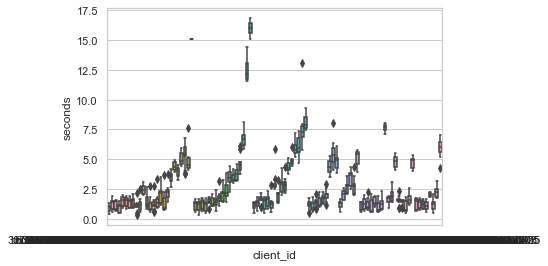

In [31]:
df_ = clients_df
df_ = df_[df_["eval"] == True]
sns.boxplot(x="client_id", y="seconds", data=df_)

In [32]:
clients_df.groupby("round").count()

,Unnamed: 0,client_id,session_id,invocation_time,function,seconds,eval,function_type,function_host
round,,,,,,,,,
0,23,23,23,23,23,23,23,23,23
1,49,49,49,49,49,49,49,49,49
2,47,47,47,47,47,47,47,47,47
3,49,49,49,49,49,49,49,49,49
4,48,48,48,48,48,48,48,48,48
5,47,47,47,47,47,47,47,47,47
6,48,48,48,48,48,48,48,48,48
7,46,46,46,46,46,46,46,46,46
8,46,46,46,46,46,46,46,46,46
